--------------------------------------------
## ***Código Tarea Numérica***
--------------------------------------------


#<h1>Parte 0</h1>

***Definición de constantes, funciones e importación de libererías.***

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from scipy.integrate import solve_ivp as sp

In [ ]:
#Constantes
a_s=10**-2
a_h=7*(10**-2)
b_1=3*(10**-2)
b_2=3*(10**-2)
s=5*(10**-4)
p=5*(10**-3)
r=10**-2
L=10**2


x_C0=10**2
y0=L
a0=0

In [ ]:
#Funciones
def a_c(x_C,x_E,p,k):
  return p*(x_C +k*x_E)

def C_C(x_C,x_E,p,k,s,a):
  cc = a_c(x_C,x_E,p,k)
  return s*x_C*min(1,a/cc)

def C_E(x_C,x_E,p,k,s,a):
  cc = a_c(x_C,x_E,p,k)
  return k*s*x_E*min(1,a/cc)

def a_1(x_C,x_E,p,k,s,a,a_s,a_h):
  A1 = C_C(x_C,x_E,p,k,s,a)
  return a_s +max(0,1-A1/(s*x_C))*(a_h-a_s)

def a_2(x_C, x_E, p, k, s, a, a_s, a_h):
  A2 = C_E(x_C, x_E, p, k, s, a)
  return a_s+max(0,1-A2/(s*x_E))*(a_h-a_s)


#<h1>Parte 1</h1>

***Utilización de metodos, graficación y errores***

Notemos que si x_E, a e y son constantes, entonces de las 4 ecuaciones que teniamos en un principio, 3 se eliminan, quedando sola la EDO para la variable x_C. Entonces se nos pide resolverla mediante los metodos de Euler progresivo, Heun y Runge Kutta 4. Para esto seguiremos los pasos mencionados en el enunciado:


### Paso 1: Definición de función

In [ ]:

########
#Definimos las constantes para esta parte de la tarea. Pueden llegar a cambiar en un futuro
D = 1
k = 1
h = 1
x_E = 0
y = 20
a = 250
#############

In [ ]:

#Función que define el parte derecho de la EDO para x_C
def F1(t, x_C, args):

  #Definición de args: Las variables que ocuparemos todo junto en una varialble.
  a_s, a_h, b_1, b_2, s, p, r, L, x_C0, y0, a0, x_E, y, a, k = args


  return (b_1 - a_1(x_C, x_E, p, k, s, a, a_s, a_h)) * x_C

### Paso 2: Simulación y solución numerica

##### Metodo de Euler Progresivo

In [ ]:
#Función de euler progresivo
def Euler_prog(f, ti, tf, h, x0, args):


  #Cantidad de subintervalos
  N = int((tf-ti)/h)

  #Arreglo de t
  t = np.linspace(ti, tf, N)

  #Arreglo para x
  if type(x0) == int or type(x0) == float:
    x = np.zeros(N)
  else:
    x = np.zeros((N,len(x0)))

  #Condición inicial
  x[0] = x0

  #Método de Euler
  for i in range(N-1):
    x[i+1] = x[i] + h*f(t[i],x[i],args)

  # Devuelve tanto el arreglo para t como el de x
  return (t, x)

##### Metodo de Heun

In [ ]:
#Función de Heun
def heun(f,ti,tf,h,x0,args):

  #Cantidad de subintervalos
  N = int((tf-ti)/h)

  #Arreglo de t
  t = np.linspace(ti, tf, N)

  #Arreglo para la solución
  if type(x0) == int or type(x0) == float:
    x = np.zeros(N)
  else:
    x = np.zeros((N,len(x0)))

  #Condición inicial
  x[0] = x0

  #Método de Heun
  for i in range(N-1):
    x_tilda = x[i] + h*f(t[i],x[i],args)
    x[i+1] = x[i] + h/2*(f(t[i],x[i],args)+f(t[i+1],x_tilda,args))

  #Devuelve tanto el arreglo para t como el de x
  return (t,x)

##### Metodo de Runge Kutta 4

In [ ]:
#Método de Runge Kutta 4
def RK4(f,ti,tf,h,x0,args):
  #Cantidad de subintervalos
  N = int((tf-ti)/h)

  #Arreglo de t
  t = np.linspace(ti, tf, N)

  #Arreglo para la solución
  if type(x0) == int or type(x0) == float:
    x = np.zeros(N)
  else:
    x = np.zeros((N,len(x0)))

  #Condición inicial
  x[0] = x0

  #Método de Runge Kutta 4
  for i in range(N-1):
    g1 = f(t[i]      , x[i]       , args)
    g2 = f(t[i] + h/2, x[i]+h/2*g1, args)
    g3 = f(t[i] + h/2, x[i]+h/2*g2, args)
    g4 = f(t[i] + h  , x[i]+h*g3  , args)
    x[i+1] = x[i] + h/6*(g1 + 2*g2 + 2*g3 + g4)

  #Devuelve tanto el arreglo para t como el de x
  return (t,x)

### Paso 3: Gráficos obtenidos

In [ ]:
args = (a_s, a_h, b_1, b_2, s, p, r, L, x_C0, y0, a0, x_E, y, a, k)
#Pasos a ocupar:
H1 = 2**(-1)
H2 = 2**(-2)
H3 = 2**(-8)

In [ ]:
#Soluciones para h=0.5
t1, x_Ceuler1 = Euler_prog(F1, 0, 1000, H1, x_C0, args)
t1, x_Cheun1 = heun(F1, 0, 1000, H1, x_C0, args)
t1, x_CRK41 = RK4(F1, 0, 1000, H1, x_C0, args)

#Soluciones para h=0.25
t2, x_Ceuler2 = Euler_prog(F1, 0, 1000, H2, x_C0, args)
t2, x_Cheun2 = heun(F1, 0, 1000, H2, x_C0, args)
t2, x_CRK42 = RK4(F1, 0, 1000, H2, x_C0, args)


#Soluciones para h=1 y valor referente de Runge Kutta
t3, sol_ref = RK4(F1, 0, 1000, H3, x_C0, args)
t, x_CRK4 = RK4(F1, 0, 1000, h, x_C0, args)
I1, SOL1= Euler_prog(F1, 0, 1000, 1, x_C0, args)
I2, SOL2= heun(F1, 0, 1000, 1, x_C0, args)

In [ ]:
#Definimos args
args = (a_s, a_h, b_1, b_2, s, p, r, L, x_C0, y0, a0, x_E, y, a, k)

#Método de Euler progresivo
t, x_Ceuler = Euler_prog(F1, 0, 1000, h, x_C0, args)

#Método de Heun
t, x_Cheun = heun(F1, 0, 1000, h, x_C0, args)

#Método de Runge Kutta 4
t, x_CRK4 = RK4(F1, 0, 1000, h, x_C0, args)

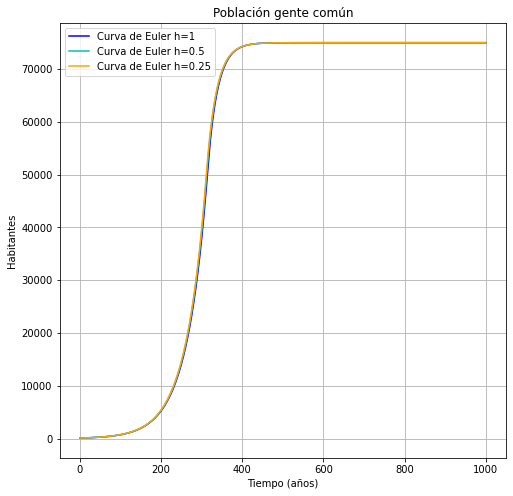

In [ ]:
# Figura y tamaño de la figura
plt.figure(figsize=(8,8)) #Un poco mas grande de lo usual para que se notara un poco mas las curvas

# Gráfico
plt.plot(t,x_Ceuler,color="blue", label="Curva de Euler h=1")
plt.plot(t1,x_Ceuler1,color="c", label="Curva de Euler h=0.5")
plt.plot(t2,x_Ceuler2,color="orange", label="Curva de Euler h=0.25")
# Título
plt.title("Población gente común")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Habitantes")
plt.grid()
# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

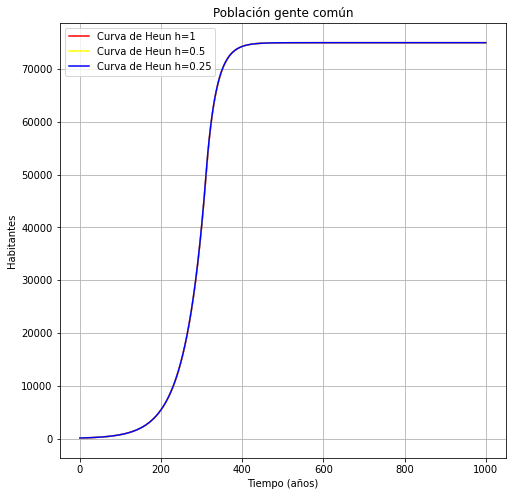

In [ ]:
# Figura y tamaño de la figura
plt.figure(figsize=(8,8))

# Gráfico
plt.plot(t,x_Cheun,color="red",label="Curva de Heun h=1")
plt.plot(t1,x_Cheun1,color="yellow",label="Curva de Heun h=0.5")
plt.plot(t2,x_Cheun2,color="blue",label="Curva de Heun h=0.25")
# Título
plt.title("Población gente común")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Habitantes")
plt.grid()
# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

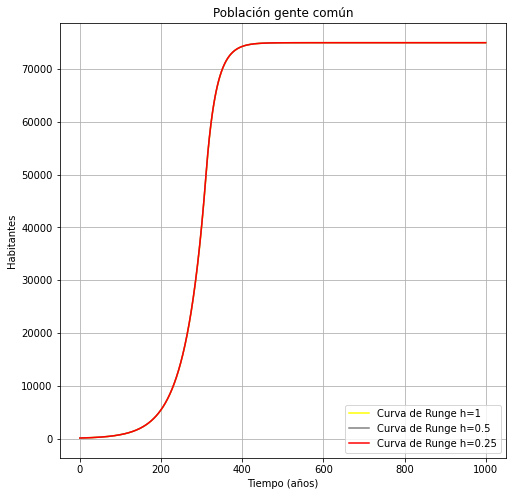

In [ ]:
# Figura y tamaño de la figura
plt.figure(figsize=(8,8))

# Gráfico
plt.plot(t,x_CRK4,color="yellow",label="Curva de Runge h=1")
plt.plot(t1,x_CRK41,color="grey",label="Curva de Runge h=0.5")
plt.plot(t2,x_CRK42,color="red",label="Curva de Runge h=0.25")

# Título
plt.title("Población gente común")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Habitantes")
plt.grid()
# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

##### Observaciones


Notablemente todos los graficos dieron practicamente iguales, esto puede deberse a la dificultad de la ecuación en sí, ya que dependiendo de esto, los metodos arrojaran resultados con mejores aproximaciones. A su vez con esto no podemos decir a ciencia cierta cual de todos los metodos es mas preciso o entrega mejor información que otro. Por otra parte, para valores distintos de h, tambien se conserva los graficos, por lo que podemos esperar que para valores relativamente cercanos a 1 o 0, las soluciones no se alteran.

### Paso 4: Nuevos errores

In [ ]:

#Valor de referencia para el error asociado
args = (a_s, a_h, b_1, b_2, s, p, r, L, x_C0, y0, a0, x_E, y, a, k)
t3, sol_ref = RK4(F1, 0, 1000, H3, x_C0, args)

##########3

print("-----Errores asociados para cada uno de los pasos----\n",)

#h = 1
error_euler = np.linalg.norm(sol_ref[range(0,len(sol_ref)-1,int(len(sol_ref)/len(x_Ceuler)))] - x_Ceuler)
error_heun  = np.linalg.norm(sol_ref[range(0,len(sol_ref)-1,int(len(sol_ref)/len(x_Cheun)))] - x_Cheun)
error_RK4   = np.linalg.norm(sol_ref[range(0,len(sol_ref)-1,int(len(sol_ref)/len(x_CRK4)))] - x_CRK4)
print(f"Error de Euler para h={h}: {error_euler}")
print(f"Error de Heun para  h={h}: {error_heun}")
print(f"Error de RK4 para h={h}: {error_RK4}")
print()


print("-----------------------------------------\n")
##########

#h =0.5
error_euler1 = np.linalg.norm(sol_ref[range(0,len(sol_ref)-1,int(len(sol_ref)/len(x_Ceuler1)))] - x_Ceuler1)
error_heun1  = np.linalg.norm(sol_ref[range(0,len(sol_ref)-1,int(len(sol_ref)/len(x_Cheun1)))] - x_Cheun1)
error_RK41   = np.linalg.norm(sol_ref[range(0,len(sol_ref)-1,int(len(sol_ref)/len(x_CRK41)))] - x_CRK41)
print(f"Error de Euler para h={H1}: {error_euler1}")
print(f"Error de Heun para  h={H1}: {error_heun1}")
print(f"Error de RK4 para   h={H1}: {error_RK41}")
print()

#########

print("-------------------------------------------\n")
#h =0.25
error_euler2 = np.linalg.norm(sol_ref[range(0,len(sol_ref)-1,int(len(sol_ref)/len(x_Ceuler2)))] - x_Ceuler2)
error_heun2  = np.linalg.norm(sol_ref[range(0,len(sol_ref)-1,int(len(sol_ref)/len(x_Cheun2)))] - x_Cheun2)
error_RK42   = np.linalg.norm(sol_ref[range(0,len(sol_ref)-1,int(len(sol_ref)/len(x_CRK42)))] - x_CRK42)
print(f"Error de Euler para h={H2}: {error_euler2}")
print(f"Error de Heun para  h={H2}: {error_heun2}")
print(f"Error de RK4 para   h={H2}: {error_RK42}")

-----Errores asociados para cada uno de los pasos----

Error de Euler para h=1: 17502.430181173073
Error de Heun para  h=1: 140.44688915375048
Error de RK4 para h=1: 1.9030687270648974

-----------------------------------------

Error de Euler para h=0.5: 12401.273927910253
Error de Heun para  h=0.5: 51.75469961154258
Error de RK4 para   h=0.5: 2.2059222478230436

-------------------------------------------

Error de Euler para h=0.25: 8774.169972965929
Error de Heun para  h=0.25: 16.603758272088434
Error de RK4 para   h=0.25: 0.2663595094228291


# Parte 2

Consideremos ahora x_E=0, entonces nos quedan 3 ecuaciones para 3 variables, y,x_C, a. En esta parte solucionaremos todas estas EDOS como un sistema, que lo definiremos mediantes matrices y vectores como se hace a continuación:

### Definición de función

In [ ]:
X0=(x_C0,y0,a0)
args =(a_s,a_h,b_1,b_2,s,p,r,L,x_E,k,D)
#Función lado derecho de xC, y, a.
def F2(t,X,args):
  x_C, y, a = X
  a_s, a_h, b_1, b_2, s, p, r, L, x_E, k, D = args

  #Derivadas
  dx_C = (b_1 - a_1(x_C, x_E, p, k, s, a, a_s, a_h)) * x_C
  dy = r * y * (L - y) - D * x_C * y
  da = D * x_C * y - C_C(x_C, x_E, p, k, s, a) - C_E(x_C, x_E, p, k, s, a)

  #Retornamos el arreglo correspondiente
  return np.array([dx_C, dy, da])


Ahora, debemos demostrar que existe un D gorro tal que maximiza a X_L. Sea e=$\frac{Ah-b1}{Ah-As}$ Primero expresemos X_L de forma conveniente:

$$ \chi = r\,\frac {LD-es} {D^2} =\,\frac {rLD} {D^2}-\frac {res} {D^2}=\frac {rL} {D}-\frac {res} {D^2}$$

Teniendo escrito X_L de esa manera procedemos a derivar con respecto a D:



 **⟹**   $$ \chi' = \frac {-rL} {D^2}-\frac {-res\times2D} {D^4}=\frac {-LrD+2ers} {D^3} $$


Teniendo este resultado, igualamos a cero y despejamos:

**⟹**

$$-LrD+2ers=0  ⟺ 2es=LD$$


$\therefore$ $\exists$  $\hat{D}$  tal que es punto critico y cumple con:
$$\hat{D}=\frac {2es} {L}$$

Remplazando este valor en $\chi$ :

$$\chi(\hat{D})=\frac {rL^2} {2es}-\frac {resL^2} {4e^2s^2}= \frac {2rL^2} {4es}-\frac {rL^2} {4es}= \frac {rL^2} {4es}=\frac {rL} {2}\times \frac {L} {2es}=\frac {rL} {2\hat{D}}$$

Este valor lo llamamos carga limite optima $\ \chi_M=\frac {rL} {2\hat{D}} $

### Soluciones con los metodos

In [ ]:
e=(a_h-b_1)/(a_h-a_s)
D=(2*e*s)/L
k=1
args =(a_s,a_h,b_1,b_2,s,p,r,L,x_E,k,D)
chi =(r/D)*(L-e*(s/D))

In [ ]:
#Aplicamos Método de euler
#Solución con metodo de euler para y, a, x_C
T1, X_Euler = Euler_prog(F2, 0, 1000, h, X0, args)

### Gráfico de soluciones

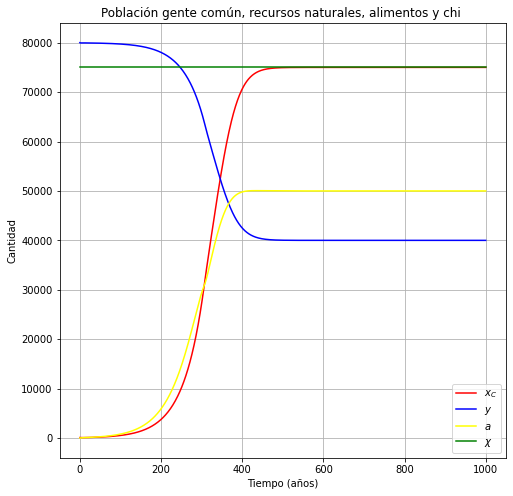

In [ ]:

CHI_ = np.zeros(1000)


for i in range(1000):
  CHI_[i] = chi



# Figura y tamaño de la figura
plt.figure(figsize=(8,8)) #Un poco mas grande de lo usual para que se notara un poco mas las curvas

# Gráfico
plt.plot(T1,X_Euler[:,0], "-", label="$x_C$",color="red")
plt.plot(T1,X_Euler[:,1] * 8 * L,label="$y$",color="blue")
plt.plot(T1,X_Euler[:,2] * 2 * L, label="$a$",color="yellow")
plt.plot(T1,CHI_, label="$\chi$",color="green")

# Título
plt.title("Población gente común, recursos naturales, alimentos y chi ")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")
plt.grid()
# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

### Descripción
Primero que todo notemos que la población de la gente común (x_C) tiende a crecer durante los primeros 400 años pero posteriormente, se estabiliza y permanece constate durante todo el tiempo siguiente, donde su valor corresponde a la carga limite optima calculada en los principios de esta parte 2. Notemos ademas que el alimento (a) tiene un comportamiento muy similar al de x_C, este crece y posteriormente tambien se mantiene estable en los mismos años. Al contrario de estas dos variables, los recursos naturales (y) decaen a medida que pasa el tiempo pero ya cuando pasan 400 años, tambien se mantiene constante, esto puede ser debido a que los habitantes necesitaran mayor cantidad de recursos ya que estos crecen en cantidad y entonces la naturaleza disponible decaerá tambien lo que a su vez implica necesariamente que el alimento aumenta. Factores tambien como las tasas de desaparición y de nacimiento tambien influyen, pues, como estas varian en el tiempo, para años mas avanzados, estas tasas eventualmente se tenderán a estabilizar unas a otras, por lo que la población de la gente comun tambien lo hará, justamente como se muestra en el grafico.

Con respecto al valor de k, este no juega ningun papel importante en cuanto a las soluciones, puesto que k solo influye en a_C y ademas x_E=0, por lo que ∀ k, a_C no depende de nada mas que p y x_C y entonces, en conclusión, podemos usar cualquier k a gusto solo si x_E=0.

### Solvers

In [ ]:
#Utilizamos ahora un nuevo valor para D, 5.5 Dgorro
D=5.5*(2*e*s/L)
args=(a_s,a_h,b_1,b_2,s,p,r,L,x_E,k,D)


#Soluciones con solvers e intervalos asociados para posteriormente graficar. Todo esto para y, a, x_C


Sol1=sp(F2,(0,1000),X0,rtol=10**(-3),args=(args,))
Sol2=sp(F2,(0,1000),X0,rtol=10**(-12),args=(args,))

I_F,X_F=Sol1["t"],Sol1["y"]
dx_C1,dy1,da1= X_F[0],X_F[1],X_F[2]
I_G,X_G=Sol2["t"],Sol2["y"]
dx_C2,dy2,da2= X_G[0],X_G[1],X_G[2]



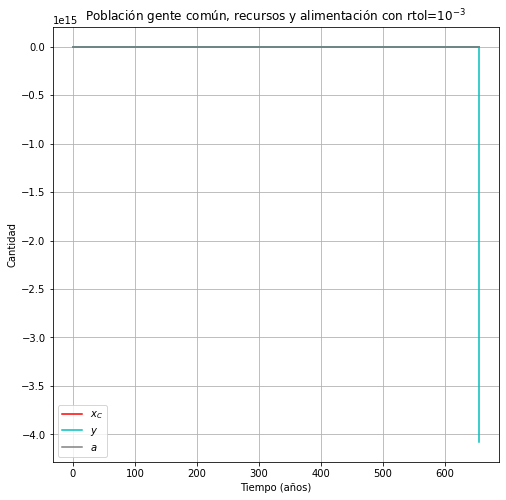

In [ ]:
# Figura y tamaño de la figura
plt.figure(figsize=(8,8)) #Un poco mas grande de lo usual para que se notara un poco mas las curvas

# Gráfico
plt.plot(I_F,dx_C1,label="$x_C$",color="red")
plt.plot(I_F,dy1 *L,"-",label="$y$",color="c")
plt.plot(I_F,da1 *L, label="$a$",color="grey")
# Título
plt.title("Población gente común, recursos y alimentación con rtol=$10^{-3}$")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")
plt.grid()
# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

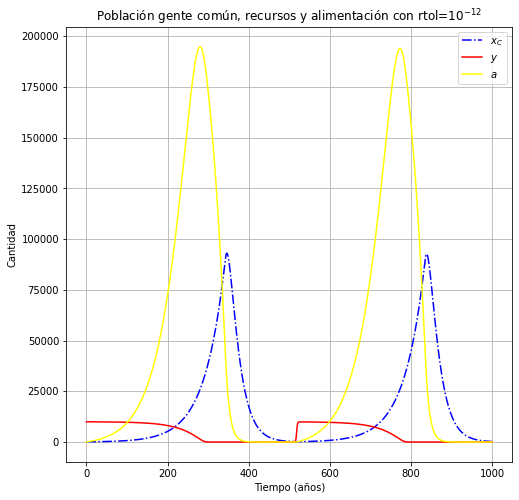

In [ ]:
# Figura y tamaño de la figura
plt.figure(figsize=(8,8)) #Un poco mas grande de lo usual para que se notara un poco mas las curvas

# Gráfico
plt.plot(I_G,dx_C2, "-.", label="$x_C$",color="blue")
plt.plot(I_G,dy2 *L,label="$y$",color="red")
plt.plot(I_G,da2 *L, label="$a$",color="yellow")
# Título
plt.title("Población gente común, recursos y alimentación con rtol=$10^{-12}$ ")

# Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")
plt.grid()
# Leyendas
plt.legend()

# Mostramos la figura
plt.show()

### Descripción

$En$ $cuanto$ $a$ $las$ $soluciones$ $y$ $graficos$ $entregados$ $mediante$ $los$ $solvers$ $,$ $se$ $puede$ $mencionar$ $que$ $a$ $valores$ $pequeños$ $de$ $rtol,$ $las$ $funciones$ $tienden$ $a$ $tener$ $una$ $periodicidad$ $fija,$ $donde$ $cada$ $cierto$ $tiempo,$ $se$ $alcanzan$ $los$ $mismos$ $minimos$ $o$ $maximos.$ $Podemos$ $analizar$ $tambien$ $que$ $a$ $medida$ $que$ $crece$ $la$ $cantidad$ $de$ $alimento,$ $disminuye$ $los$ $recursos$ $naturales,$ $lo$ $cual$ $tiene$ $sentido$ $pues$ $la$ $naturaleza$ $provee$ $los$ $bienes$ $para$ $la$ $alimentación.$ $A$ $su$ $vez,$ $a$ $medida$ $que$ $crece$ $la$ $población$ $de$ $gente$ $comun,$ $la$ $demanda$ $de$ $alimento$ $crece,$ $por$ $lo$ $que$ $los$ $recuros$ $a$ $su$ $vez$ $disminiyen.  $





# Parte 3

### Definición de función

In [ ]:
k=1
x_E0 = 25

In [ ]:
#Función lado derecho de xC, xE, y, a.
def F3(t,X,args):
  #Desempaquetamos
  x_C, x_E, y, a = X
  a_s, a_h, b_1, b_2, s, p, r, L, k, D = args

  #Derivadas
  dx_C = (b_1 - a_1(x_C, x_E, p, k, s, a, a_s, a_h)) * x_C
  dx_E = (b_2 - a_2(x_C, x_E, p, k, s, a, a_s, a_h)) * x_E
  dy = r * y * (L - y) - D * x_C * y
  da = D * x_C * y - C_C(x_C, x_E, p, k, s, a) - C_E(x_C, x_E, p, k, s, a)

  #Retornamos el arreglo correspondiente
  return np.array([dx_C, dx_E, dy, da])

$Sea$ $\varphi=\frac{x_E(0)}{x_C(0)}$, $encontremos$ $entonces$ $los$ $maximos$ $de$ $\chi=\frac{r}{D}(L-e\frac{s}{D}(1+\varphi))(1+\varphi)$. $Nuevamente$ $derivemos$ $con$ $respecto$ $a$ $D$ $y$ $nos$ $queda:$

$$ \chi' = \frac {d} {dD}(\frac {r} {D}\times\frac {LD-(es+es\varphi)} {D}\times (1+\varphi) )=\frac {d} {dD}(\frac {r\times(LD-es-es\varphi)} {D^2}\times(1+\varphi) )$$

$$ \chi' = \frac {d} {dD}(\frac {rL} {D}-\frac {res} {D^2}-\frac {2res\varphi} {D^2}+\frac {r\varphi L} {D}-\frac {r\varphi ^2es} {D^2})$$

$$ \chi' = -\frac {D(Lr+Lr\varphi)} {D^3}+\frac {2ers+4ers\varphi+2ers\varphi ^2 } {D^3}$$

$Igualando$ $esta$  $expresión$ $a$ $0$, $nos$ $queda$ $lo$ $siguiente:$

$$-D(Lr+Lr\varphi)+2ers+4ers\varphi+2ers\varphi ^2=0$$

⟹ $$D=\frac {2ers(1+2\varphi+\varphi ^2)} {Lr(1+\varphi)}$$


$LLamando$ $\tilde{D}=\frac {2es(1+\varphi)} {L},$ $entonces$ $este$ $valor$ $maximiza$ $a$ $\chi$. $Evaluemos$ $este$ $valor:$

$$\chi(\tilde{D})=\frac {rL} {2es(1+\varphi)}(L-\frac {es(1+\varphi)L} {2es(1+\varphi)})(1+\varphi)=\frac {rL} {2es(1+\varphi)}\frac {L} {2}(1+\varphi)=(1+\varphi)\frac {rL} {2}\frac {L} {2es(1+\varphi)}=(\varphi+1)\frac {rL} {2\tilde{D}}$$

$A$ $este$ $valor$ $lo$ $llamamos$ $\chi_M$ $y$ $es$ $la$ $llamada$ $carga$ $optima.$


### Soluciones con los metodos

In [ ]:
#Deinición y nuevo valor de D
phi=x_E0/x_C0
D=((2*e*s)*(1+phi))/L

In [ ]:
args = (a_s, a_h, b_1, b_2, s, p, r, L, k, D)
X0 = (x_C0, x_E0, y0, a0)
T2, X_Euler1 = Euler_prog(F3, 0, 1000, h, X0, args)

### Gráficos

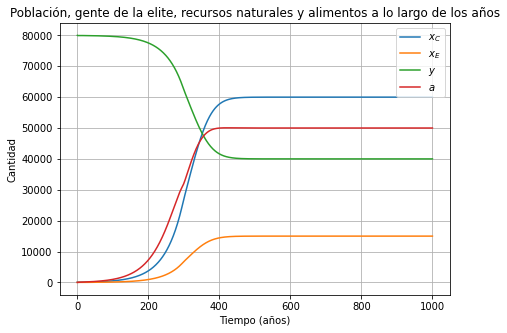

In [ ]:
#Figura y tamaño de la figura
plt.figure(figsize=(7,5))

#Gráficos
plt.plot(T2,X_Euler1[:,0], label="$x_C$")
plt.plot(T2,X_Euler1[:,1], label="$x_E$")
plt.plot(T2,X_Euler1[:,2] * 8 * L, label="$y$")
plt.plot(T2,X_Euler1[:,3] * 2 * L, label="$a$")

#Título
plt.title("Población, gente de la elite, recursos naturales y alimentos a lo largo de los años")

#Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")
plt.grid()

#Mostramos la figura y leyenda
plt.legend()
plt.show()

### Descripción
$Es$ $importante$ $apreciar$ $que$ $las$ $funciones$ $se$ $tienden$ $a$ $estabilizar$ $a$ $los$ $400$ $años$ $aproximadamente,$ $manteniendo$ $un$ $valor$ $constante$ $todos$ $posteriormente.$ $Algunas$ $relaciones$ $importantes$ $que$ $se$ $pueden$ $rescatar$ $son:$

_$Los$ $recursos$ $naturales$ $disminuyen$ $paulatinamente$ $con$ $el$ $paso$ $de$ $los$ $años,$ $y$ $los$ $alimentos$ $crecen$ $a$ $su$ $vez.$ $Estan$ $en$ $una$ $relación$ $inversamente$ $proporcional.$

_$El$ $aumento$ $del$ $alimento$ $fortifica$ $la$ $sobrevivencia$ $de$ $la$ $gente$ $comun$ $y$ $de$ $la$ $elite,$ $por$ $lo$ $que$ $la$ $tendencia$ $de$ $sus$ $graficos$ $respectivos$ $es$ $crecer$ $y$ $estabilizarse.$

### Soluciones con solvers y graficos.

In [ ]:
#Nuevo valor para D
D=5*((2*e*s)*(1+phi))/L
args =(a_s, a_h, b_1, b_2, s, p, r, L, k, D)

In [ ]:
#Soluciones con solvers
Sol3=sp(F3,(0,1000),X0,rtol=10**(-3),args=(args,))
Sol4=sp(F3,(0,1000),X0,rtol=10**(-12),args=(args,))

I_Q, X_Q = Sol3["t"], Sol3["y"]
dxC3, dxE3, dy3, da3 = X_Q[0], X_Q[1], X_Q[2], X_Q[3]
I_U, X_U = Sol4["t"], Sol4["y"]
dxC4, dxE4, dy4, da4 = X_U[0], X_U[1], X_U[2], X_U[3]

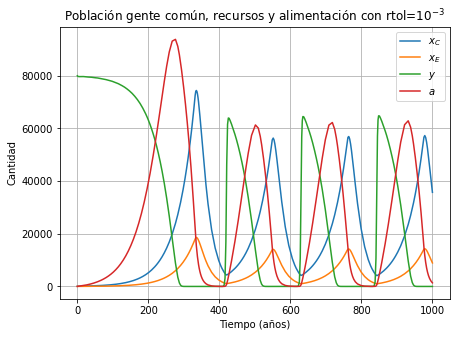

In [ ]:
#Gráfico para rtol 10^(-3)
#Figura y tamaño de la figura
plt.figure(figsize=(7,5))

#Gráficos
plt.plot(I_Q, dxC3, label="$x_C$")
plt.plot(I_Q, dxE3, label="$x_E$")
plt.plot(I_Q, dy3 * 8 * L, label="$y$")
plt.plot(I_Q, da3 * L / 2, label="$a$")

#Título
plt.title("Población gente común, recursos y alimentación con rtol=$10^{-3}$")

#Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")
plt.grid()
#Mostramos la figura y leyenda
plt.legend()
plt.show()

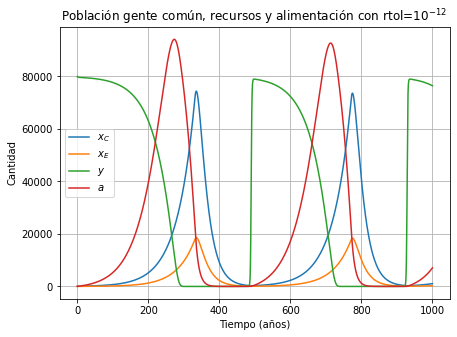

In [ ]:
#Gráfico para rtol 10^(-12)
#Figura y tamaño de la figura
plt.figure(figsize=(7,5))

#Gráficos
plt.plot(I_U, dxC4, label="$x_C$")
plt.plot(I_U, dxE4, label="$x_E$")
plt.plot(I_U, dy4 * 8 * L, label="$y$")
plt.plot(I_U, da4 * L / 2, label="$a$")

#Título
plt.title("Población gente común, recursos y alimentación con rtol=$10^{-12}$ ")

#Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")
plt.grid()
#Mostramos la figura y leyenda
plt.legend()
plt.show()

### Descripción

Notemos que al igual que en la parte 2, se vuelven a presentar graficos periodicos. En este caso, para rtol= $10^{-3} el periodo es pequeño comparado con el otro rtol por lo que  los minimos y maximos se alcanzan en menor tiempo. En ambos graficos, se puede apreciar que los recursos naturales sufre periodos de crecimiento y de decrecimiento, este puede ser debido a que con un tiempo adecuado, la tierra termina por compensar lo que la población consume por lo que se mantiene una suerter de equilibrio. Los alimentos a su vez tienden a aumentar siempre cuando los recursos van disminuyendo, siempre estan en una relación inversamente proporcional. Para el rtol mas pequeño, los minimos y maximos se alcanzan en un periodo mayor al del otro, por lo que se toma mucho mas tiempo en gastarse el alimento y en consumirse todos los recursos naturales.

# Parte 4

### Soluciones con metodos numericos 1

In [ ]:
#Nuevo valor para D y k
D = 6.35 * 10**(-6)
k = 10

In [ ]:
#Redefinición de argumentos, condiciones iniciales y soluciones.
args = (a_s,a_h,b_1,b_2,s,p,r,L,k,D)
X0 = (x_C0, x_E0, y0, a0)
T5, X_Euler2 = Euler_prog(F3, 0, 1000,h,X0, args)

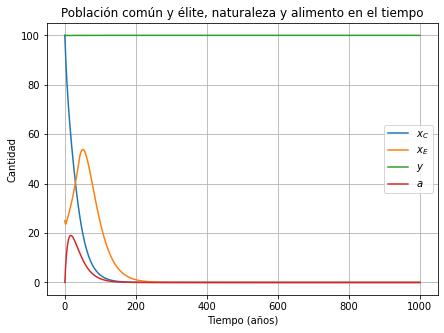

In [ ]:
#Figura y tamaño de la figura
plt.figure(figsize=(7,5))

#Gráficos
plt.plot(T5,X_Euler2[:,0], label="$x_C$")
plt.plot(T5,X_Euler2[:,1], label="$x_E$")
plt.plot(T5,X_Euler2[:,2], label="$y$")
plt.plot(T5,X_Euler2[:,3] * L / 2, label="$a$")

#Título
plt.title("Población común y élite, naturaleza y alimento en el tiempo")

#Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")
plt.grid()
#Mostramos la figura y leyenda
plt.legend()
plt.show()

### Descripción 1

Notemos que la población de la elite se mantiene mucho mejor por un tiempo que la gente comun, esto debido a que pueden comer mas que esta ultimo pero por lo mismo, el alimento se acaba mas rapido y por lo tanto, el destinto de todos es terminar con población 0 finalmente y eso ademas sumado a que los recursos naturales se mantienen constantes, por lo que va a haber cierto punto donde va a haber mucha demanda tal que ya no haya suficiente alimento para todos.

### Soluciones con metodos numericos 2

In [ ]:
D = 10**(-4)

In [ ]:
args = (a_s, a_h, b_1, b_2, s, p, r, L, k, D)
X0 = (x_C0, x_E0, y0, a0)
H=0.01
#Aplicamos Método de euler
T6, X_Euler3 = Euler_prog(F3, 0, 1000,H, X0, args)

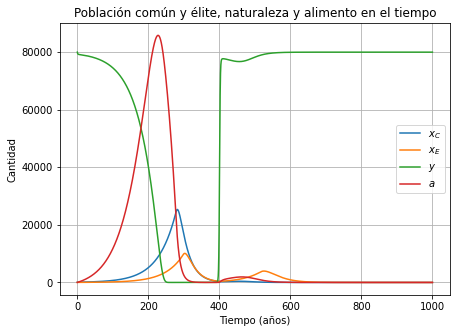

In [ ]:
plt.figure(figsize=(7,5))

#Gráficos
plt.plot(T6,X_Euler3[:,0], label="$x_C$")
plt.plot(T6,X_Euler3[:,1], label="$x_E$")
plt.plot(T6,X_Euler3[:,2] * 8 * L, label="$y$")
plt.plot(T6,X_Euler3[:,3] * L / 2, label="$a$")

#Título
plt.title("Población común y élite, naturaleza y alimento en el tiempo")

#Ejes
plt.xlabel("Tiempo (años)")
plt.ylabel("Cantidad")
plt.grid()
#Mostramos la figura y leyenda
plt.legend()
plt.show()

### Descripción 2

Notemos que los recursos naturales no son constantes, por lo que en este caso, los alimentos tienden a incrementar durante los primero 200 años pero posteriormente, sufre una decaida junto con la pronta subida de los recursos naturales. La poblacion de la gente comun supera en numero a la elite pero posteriormente a medida que el alimento se acaba, las población disminuyen en numero hasta tal punto que en cantidad son asintoticas a 0